# Linear Regression on Bank Marketing Database

http://archive.ics.uci.edu/ml/datasets/Bank+Marketing
    
This one is very famous. Given a set of features, find the clients more suitable to make a term deposit.

In [63]:
# Better than "print" on Jupyter Notebooks
from IPython.display import display

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline

## Load file and check data

In [2]:
raw = pd.read_csv("bank.csv", sep=";")

display(raw.head())
display(raw.describe().T)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


## Data preparation

Job has too many categories, so we simplify it for now. Don't do that before look at your data.

In [58]:
# Mapping "yes", "no" to 1 and 0, default to 0 if no info
raw['target'] = raw['y'].map({'no': 0, 'yes': 1}).fillna(0)

# Reducing number of levels on "jobs"
to_job_type = {'admin.': 'white collar',
               'entrepreneur': 'white collar',
               'management': 'white collar',
               'self-employed': 'white collar',
               'blue-collar': 'blue collar',
               'services': 'blue collar',
               'technician': 'blue collar'}
raw['job_type'] = raw['job'].map(to_job_type).fillna('unknown')

## Mosaics - View Relevance on Categorical Variables

A [mosaic plot](https://en.wikipedia.org/wiki/Mosaic_plot) show the proportion of each category. A visual inspection show unbalanced categories an if the feature is a potentially

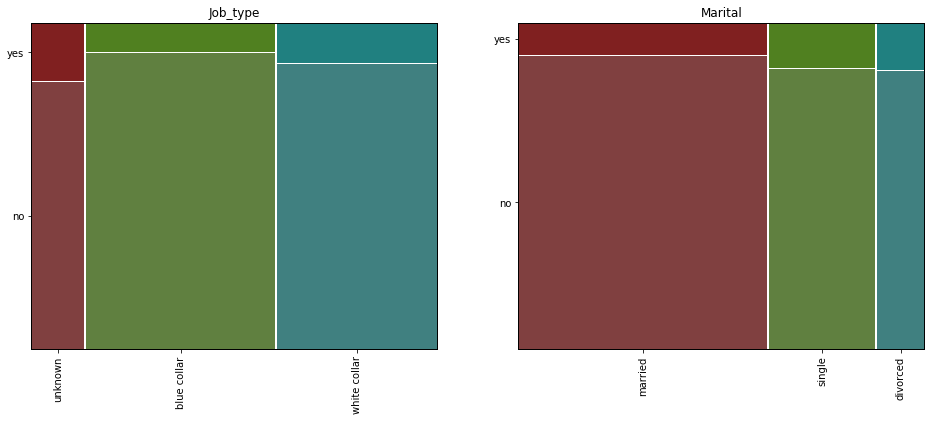

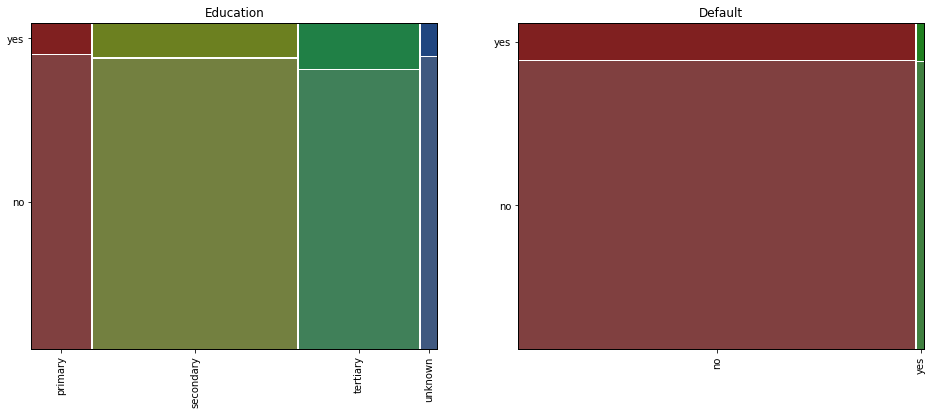

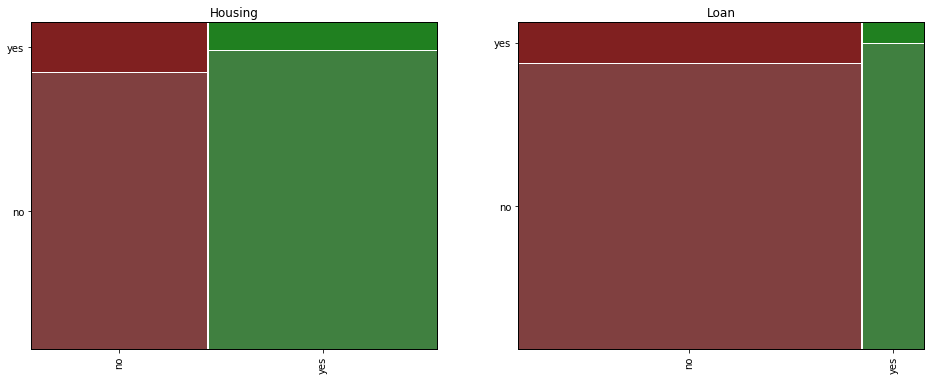

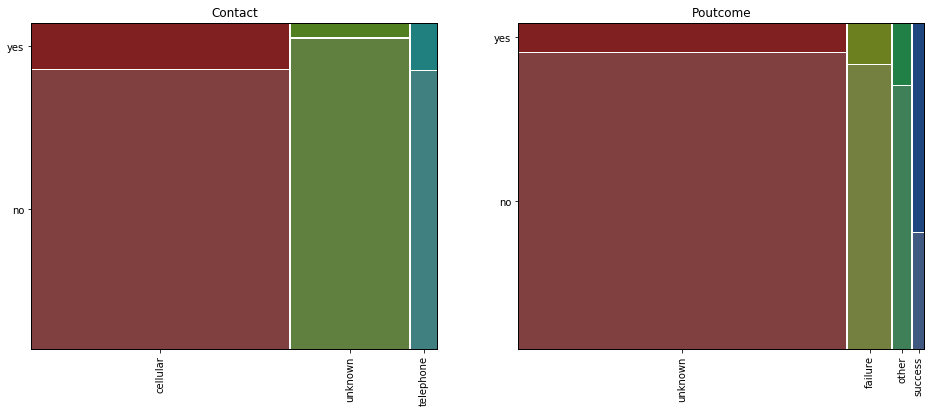

In [61]:
def mosaic_for(chart, feature_name):
    mosaic(raw, [feature_name, 'y'], 
           ax=chart,
           title=feature_name.capitalize(),
           label_rotation=[90, 0],
           labelizer=lambda k: '')
    
fig, charts = plt.subplots(1, 2, figsize=(16, 6))
mosaic_for(charts[0], 'job_type')
mosaic_for(charts[1], 'marital')

fig, charts = plt.subplots(1, 2, figsize=(16, 6))
mosaic_for(charts[0], 'education')
mosaic_for(charts[1], 'default')

fig, charts = plt.subplots(1, 2, figsize=(16, 6))
mosaic_for(charts[0], 'housing')
mosaic_for(charts[1], 'loan')

fig, charts = plt.subplots(1, 2, figsize=(16, 6))
mosaic_for(charts[0], 'contact')
mosaic_for(charts[1], 'poutcome')

# Q-Q Plot - View Relevance on Continuous Variables

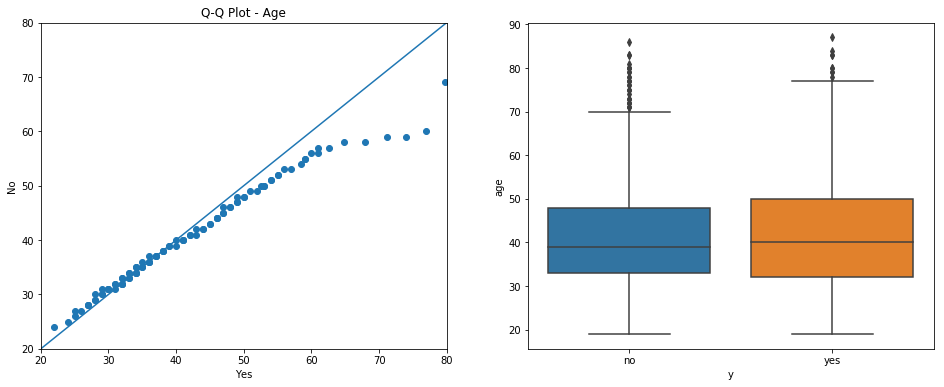

In [107]:
quantiles = range(1, 100)
age_yes = np.percentile(raw['age'][raw['y'] == 'yes'], q=quantiles)
age_no = np.percentile(raw['age'][raw['y'] == 'no'], q=quantiles)

fig, [chart1, chart2] = plt.subplots(1, 2, figsize=(16, 6))

min_max = (20, 80)
chart1.scatter(age_yes, age_no)
chart1.plot(min_max, min_max)
chart1.set_xlim(min_max)
chart1.set_ylim(min_max)
chart1.set_xlabel('Yes')
chart1.set_ylabel('No')
chart1.set_title('Q-Q Plot - Age')

sns.boxplot(data=raw, x='y', y='age', ax=chart2)